process start
end of data mungging
日付　　アクセス数
ymd
2023-07-30     18
2023-07-31     72
2023-08-01    109
2023-08-02     77
2023-08-03    113
2023-08-04    198
2023-08-05     92
2023-08-06    493
2023-08-07    332
2023-08-08    191
2023-08-09     71
2023-08-10     58
2023-08-11     63
2023-08-12    194
2023-08-13    281
2023-08-14     77
2023-08-15    191
2023-08-16    102
2023-08-17    263
2023-08-18    136
2023-08-19    174
2023-08-20     78
2023-08-21     76
2023-08-22    443
2023-08-23     81
2023-08-24     60
2023-08-25     85
2023-08-26     91
2023-08-27     21
Name: count, dtype: int64
IPアドレス　　アクセス数
from_ip_adress
200.10.100.197     411
179.43.163.134     238
37.205.76.12       154
111.225.222.34     154
221.210.134.138    154
176.97.206.252     128
196.189.87.177     127
139.59.73.226      127
3.130.236.254      127
103.112.123.217    127
Name: count, dtype: int64
URL
url
GET / HTTP/1.1                                                1039
GET /manager/html HTTP/1.1                 

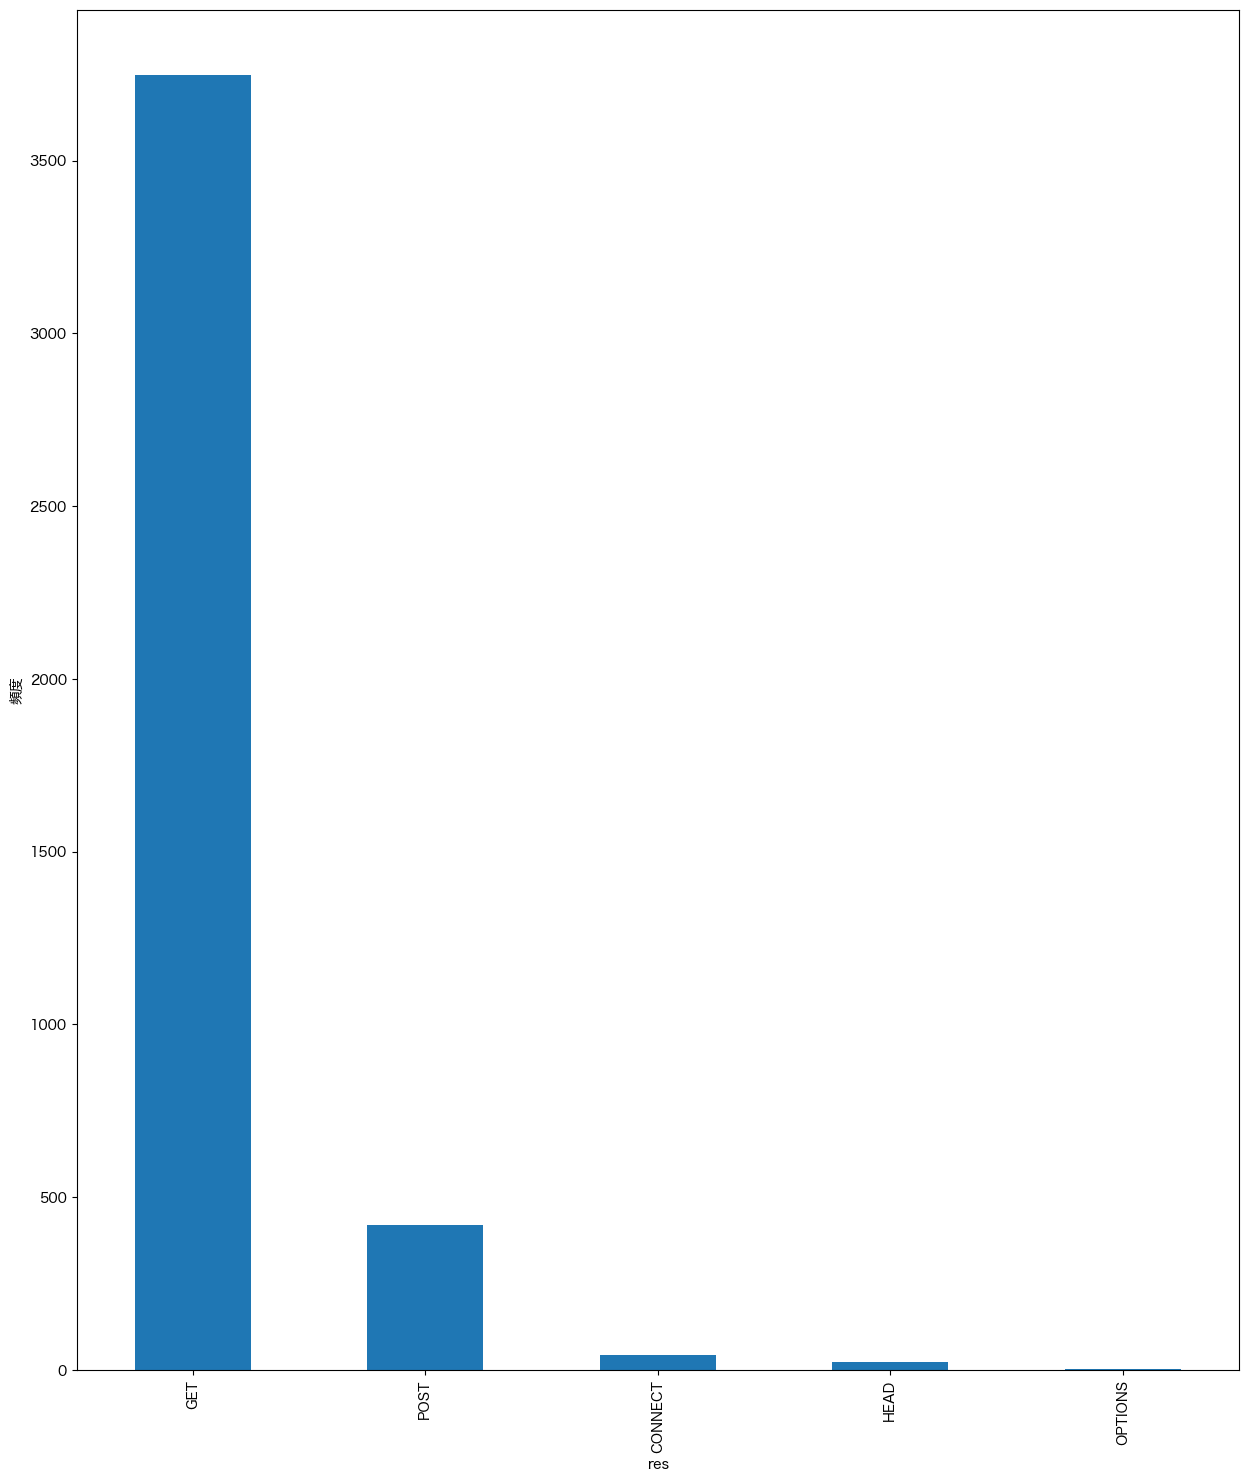

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import base64
warnings.simplefilter('ignore')
%matplotlib inline

class log_analytic_code:
    def __init__(self,fpass):
        import pandas as pd
        import matplotlib.pyplot as plt
        import warnings
        import base64
        warnings.simplefilter('ignore')
        %matplotlib inline
        self.fpass = pd.read_csv(fpass,delimiter=' ',names=('ymd','time','from_ip_adress','to_ip_address','HTTP','status_code','TorF','basic64'))
    
    def make_access_plot(self):
        print('日付　　アクセス数')
        print(self.fpass['ymd'].value_counts().sort_index())
        self.fpass['ymd'].value_counts().sort_index().to_csv('access_count.csv')
        plt.clf()
        self.fpass['ymd'].value_counts().plot(color='orange',figsize=(15,15))
        plt.xlabel('日付')
        plt.ylabel('アクセス数')
        plt.grid()
        plt.savefig('access_count.png')
    
    def make_ip_count(self,rank_c):
        print('IPアドレス　　アクセス数')
        plt.clf()
        self.fpass['from_ip_adress'].value_counts().sort_values(ascending=False).head(rank_c).plot(kind='bar',figsize=(15,15))
        self.fpass['from_ip_adress'].value_counts().sort_values(ascending=False).to_csv('ip.csv')
        print(self.fpass['from_ip_adress'].value_counts().sort_values(ascending=False).head(rank_c))
        plt.ylabel('アクセス数')
        plt.xlabel('ipアドレス')
        plt.savefig('ip_adress_count.png')
        
    def make_response_plot(self):
        print('ステータスコード')
        plt.clf()
        self.fpass['status_code'].value_counts().sort_values(ascending=False).to_csv('response_count.csv')
        self.fpass['status_code'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(15,20))
        print(self.fpass['status_code'].value_counts().sort_values(ascending=False))
        plt.ylabel('頻度')
        plt.xlabel('ステータスコード')
        plt.savefig('status_code.png')
        
    def make_url_plot(self,rank_c):
        print('URL')
        plt.clf()
        self.fpass['url'].value_counts().sort_values(ascending=False).head(rank_c).plot(kind='bar',figsize=(15,20))
        print(self.fpass['url'].value_counts().sort_values(ascending=False))
        plt.ylabel('頻度')
        plt.xlabel('url')
        plt.savefig('url.png')
    
    def make_httpres_plot(self):
        print('HTTPレスポンス')
        plt.clf()
        self.fpass['res'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(15,20))
        print(self.fpass['res'].value_counts().sort_values(ascending=False))
        self.fpass['res'].value_counts().sort_values(ascending=False).to_csv('HTTPres.csv')
        plt.ylabel('頻度')
        plt.xlabel('res')
        plt.savefig('res.png')        
    
    def display(self):
        print(self.fpass)
    
    def mung(self):
        print('process start')
        self.fpass['ymd']=self.fpass['ymd'].str.replace('[','')
        self.fpass['time']=self.fpass['time'].str.replace(']','')
        self.fpass['time']=pd.to_datetime(self.fpass['ymd'] + ' ' + self.fpass['time'],format='%Y-%m-%d %H:%M:%S+0900')
        self.fpass['ymd']=pd.to_datetime(self.fpass['ymd'],format='%Y-%m-%d')
        for i in range(0,len(self.fpass['basic64'])):
            self.fpass['basic64'][i] = base64.b64decode(self.fpass['basic64'][i]).decode()
            
        self.fpass['res']=self.fpass['HTTP']
        self.fpass['url']=self.fpass['HTTP']
        for i in range(0,len(self.fpass['HTTP'])):
#             print(self.fpass['HTTP'].str.split()[i][2])
            self.fpass['res'][i] = self.fpass['HTTP'].str.split()[i][0]
#             self.fpass['url'][i] = self.fpass['HTTP'].str.split()[i][2]
        print('end of data mungging')
            
        return self.fpass
    
    def ip_country(self):
        pass

if __name__ == "__main__":
    log_an = log_analytic_code('/Users/takishun/files/log20230827/access_log.txt') 
    try:        
        df = log_an.mung()
        log_an.make_access_plot()
        log_an.make_ip_count(10)
        log_an.make_url_plot(10)
        log_an.make_response_plot()
        log_an.make_httpres_plot()
    except:
        print('except')
    print('log_process_end')
    
    

In [1]:
import sys
import geoip2.database

ipaddress= '133.242.178.40'
reader = geoip2.database.Reader('GeoLite2-City_20180403/GeoLite2-City.mmdb')
response = reader.city(ipaddress)
print(response.country)
print(response.country.names["en"])
print(response.country.iso_code)

FileNotFoundError: [Errno 2] No such file or directory: 'GeoLite2-City_20180403/GeoLite2-City.mmdb'